# Assignment- Linear Regression (CAR PRICING)

## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing datase

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages
import numpy as np
import pandas as pd

In [3]:
#Importing dataset
car = pd.read_csv("CarPrice_Assignment.csv")
# Looking at the first ten rows
car.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
# Inspect the various aspects of the car dataframe
print(car.shape)

# No columns and rows have null values
print(car.info())

# Description about the car dataframe
print(car.describe())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

In [5]:
# look for duplicates before data cleaning
# summing up the missing values
print(car.duplicated().sum())
print(car.isnull().sum())

0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [6]:
# Split CarName and store brand of car in carcompany column
car['carcompany'] = car['CarName'].apply(lambda x: x.split(' ')[0])

# Drop CarName column as we have created the "carcompany" for it
car.drop(['CarName'],axis=1,inplace=True)

#Rename carcompany to CompanyName
car.rename(columns={'carcompany': 'CarName'}, inplace=True)

# Drop car_ID column as it is irrelevant
car.drop(['car_ID'],axis=1,inplace=True)
car.reset_index()
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
# Checking the Unique Car Name
print(car['CarName'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [8]:
# Changing the Name of the Car into Correct one
car['CarName'] = car['CarName'].str.replace('maxda','mazda')
car['CarName'] = car['CarName'].str.replace('Nissan','nissan')
car['CarName'] = car['CarName'].str.replace('porcshce','porsche')
car['CarName'] = car['CarName'].str.replace('toyouta','toyota')
car['CarName'] = car['CarName'].str.replace('vokswagen','volkswagen')
car['CarName'] = car['CarName'].str.replace('vw','volkswagen')
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [9]:
# Importing required packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

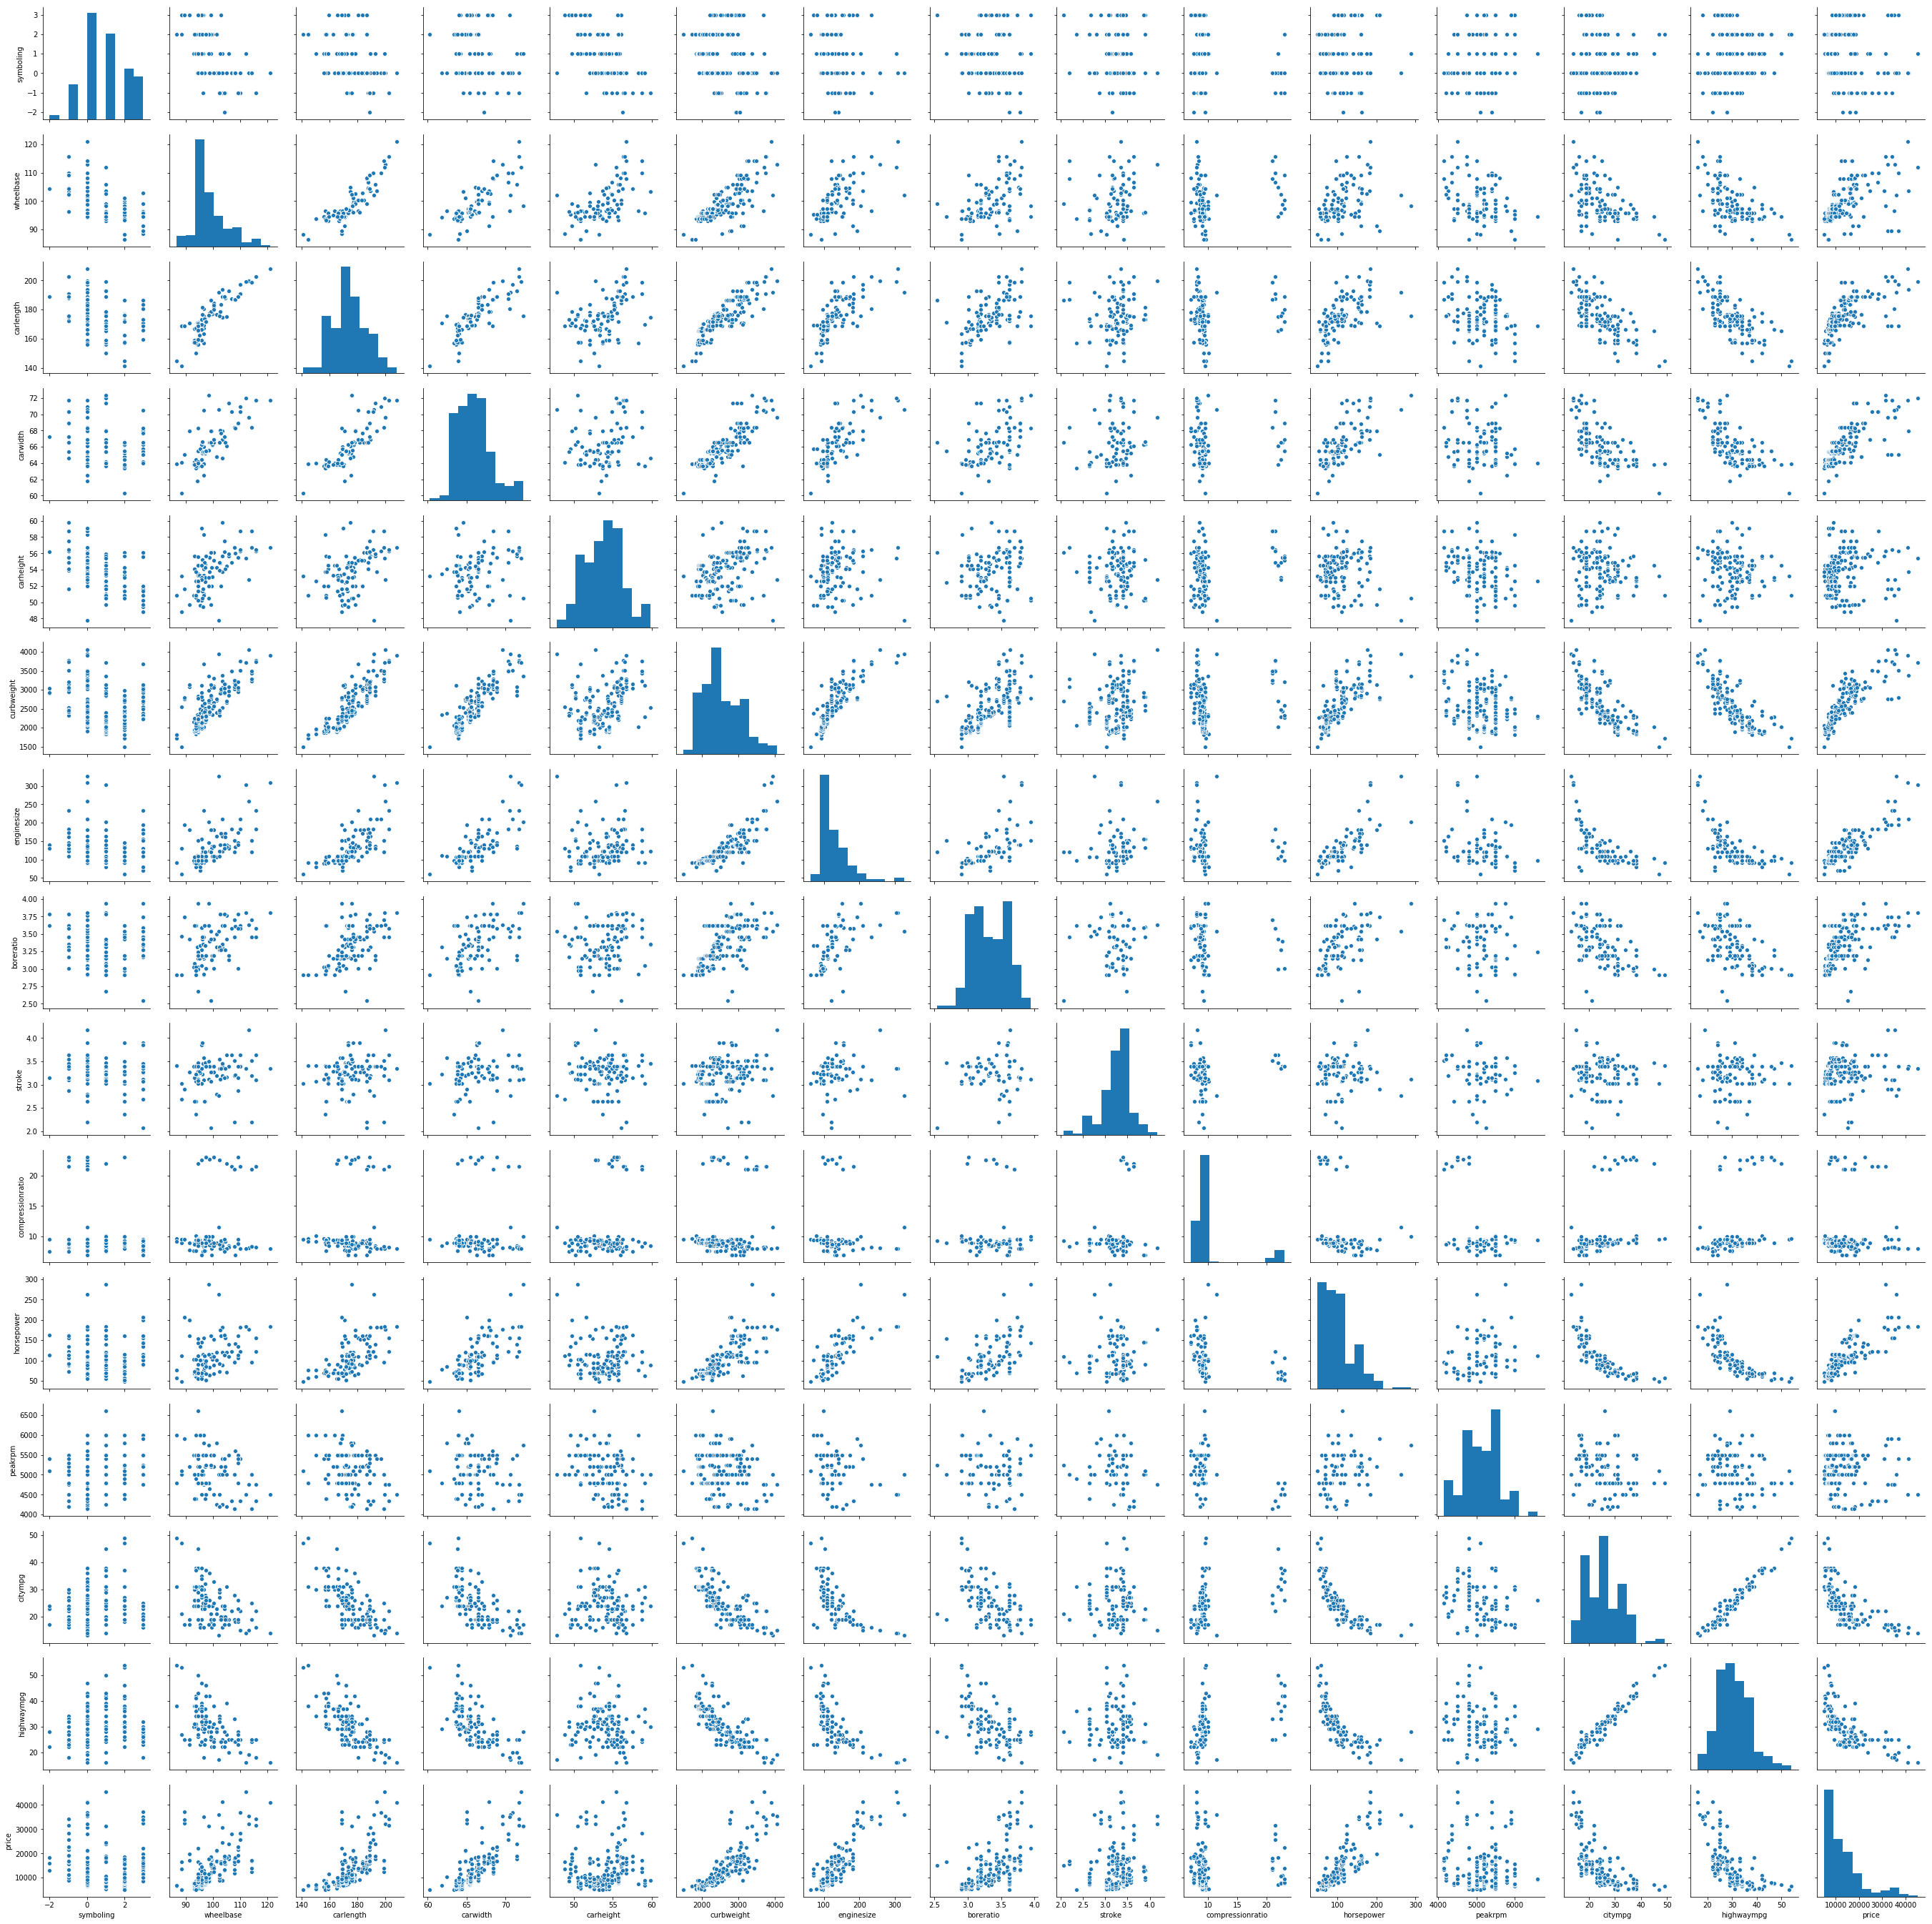

In [10]:
sns.pairplot(car)
plt.show()

### Correlation for Multivariate Analysis

In [11]:
# Correlation
features = ['price','symboling', 'wheelbase','carlength', 'carwidth', 'carheight', 'curbweight',
            'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg'] 
car_corr = car[features]
car_corr.corr()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.000000,-0.079978,0.577816,0.682920,0.759325,0.119336,0.835305,0.874145,0.553173,0.079443,0.067984,0.808139,-0.085267,-0.685751,-0.697599
symboling,-0.079978,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606
wheelbase,0.577816,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082
carlength,0.682920,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662
carwidth,0.759325,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218
carheight,0.119336,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358
curbweight,0.835305,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465
enginesize,0.874145,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470
boreratio,0.553173,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012
stroke,0.079443,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931


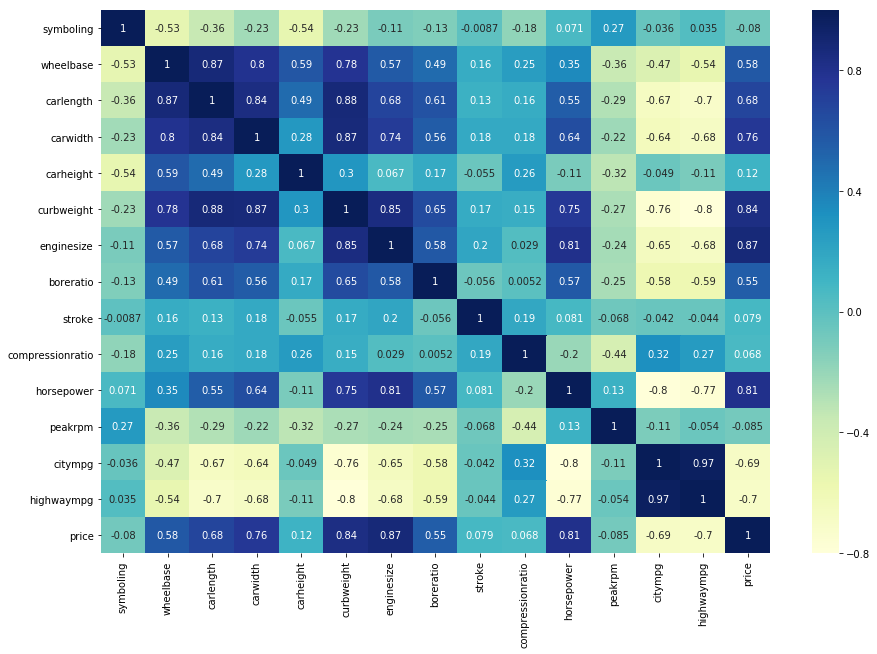

In [12]:
# Check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (15, 10))
sns.heatmap(car.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

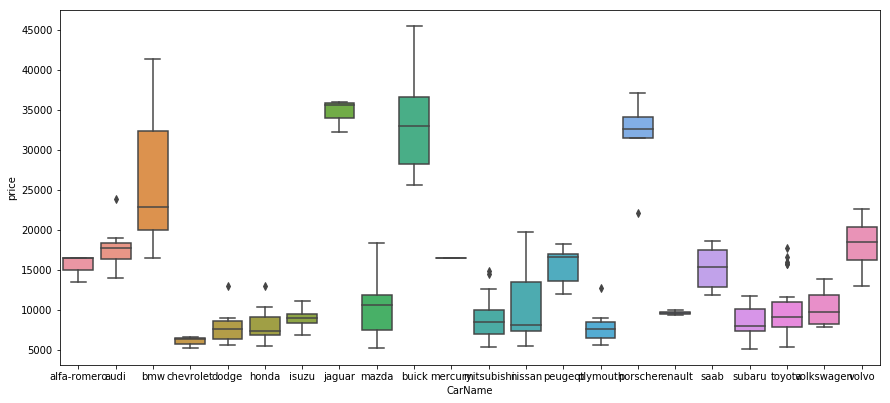

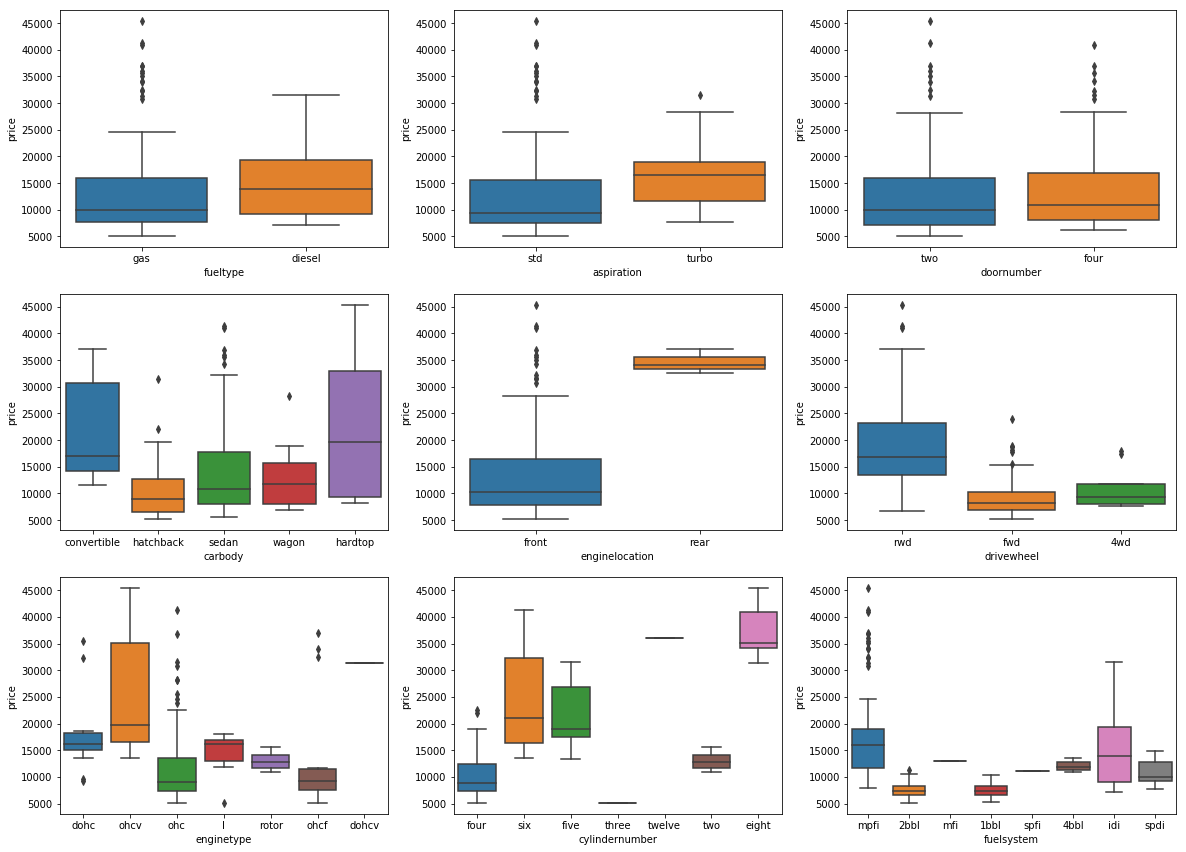

In [13]:
plt.figure(figsize=(50, 30))
plt.subplot(4,3,1)
sns.boxplot(x = 'CarName', y = 'price', data = car)
plt.figure(figsize=(20, 20))
plt.subplot(4,3,4)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(4,3,5)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(4,3,6)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(4,3,7)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(4,3,9)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(4,3,10)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(4,3,11)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(4,3,12)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

plt.show()

## Step 3: Data Preparation

You can see that your dataset has many columns with categorical values.
But in order to fit a regression line, we would need numerical values and not string. 

In [14]:
# Creating data from Catagorical variables to Numeric variables
car['fueltype'] = car['fueltype'].map({'gas': 0, 'diesel' : 1})
car['aspiration'] = car['aspiration'].map({'std' : 0, 'turbo' : 1})
car['doornumber'] = car['doornumber'].map({'two' : 0, 'four': 1})
car['enginelocation'] = car['enginelocation'].map({'front' : 0, 'rear': 1})
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Dummy Variables

In [15]:
# Multilevel variable converting to dummy
multivar = ['CarName','carbody','cylindernumber','drivewheel','enginetype','fuelsystem']
multi_var_category=car[multivar]
category_MulVar_Dummy = pd.get_dummies(multi_var_category)
category_MulVar_Dummy.head()

,CarName_alfa-romero,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Let's drop the first column from categoryMulVarDummy using 'drop_first = True'

category_MulVar_Dummy = pd.get_dummies(multi_var_category, drop_first = True)

In [17]:
# Add the results to the original car dataframe
car = pd.concat([car, category_MulVar_Dummy], axis = 1)
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,hatchback,rwd,0,94.5,171.2,65.5,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,sedan,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,sedan,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Drop newMulVarCategory as we have created the dummies for it
car.drop(multi_var_category,axis = 1, inplace=True)
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [19]:
car.dtypes

symboling                  int64
fueltype                   int64
aspiration                 int64
doornumber                 int64
enginelocation             int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
CarName_audi               uint8
CarName_bmw                uint8
CarName_buick              uint8
CarName_chevrolet          uint8
CarName_dodge              uint8
CarName_honda              uint8
CarName_isuzu              uint8
CarName_jaguar             uint8
CarName_mazda              uint8
CarName_mercury            uint8
CarName_mitsubishi         uint8
          

## Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [20]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
- Min-Max scaling 
- Standardisation (mean-0, sigma-1) 
This time, we will use MinMax scaling.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [22]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\darsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\darsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
122,0.170159,0,0,1,0,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,...,0,0,0,1,0,0,0,0,0,0
125,1.848278,0,0,0,0,-0.677177,-0.359789,1.114978,-1.382026,0.439415,...,0,0,0,0,0,0,0,1,0,0
166,0.170159,0,0,0,0,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,0,0,0,0,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,...,0,0,0,0,0,0,0,1,0,0
199,-1.507960,0,1,1,0,0.972390,1.225364,0.616439,1.627983,1.137720,...,0,0,0,0,0,0,0,1,0,0


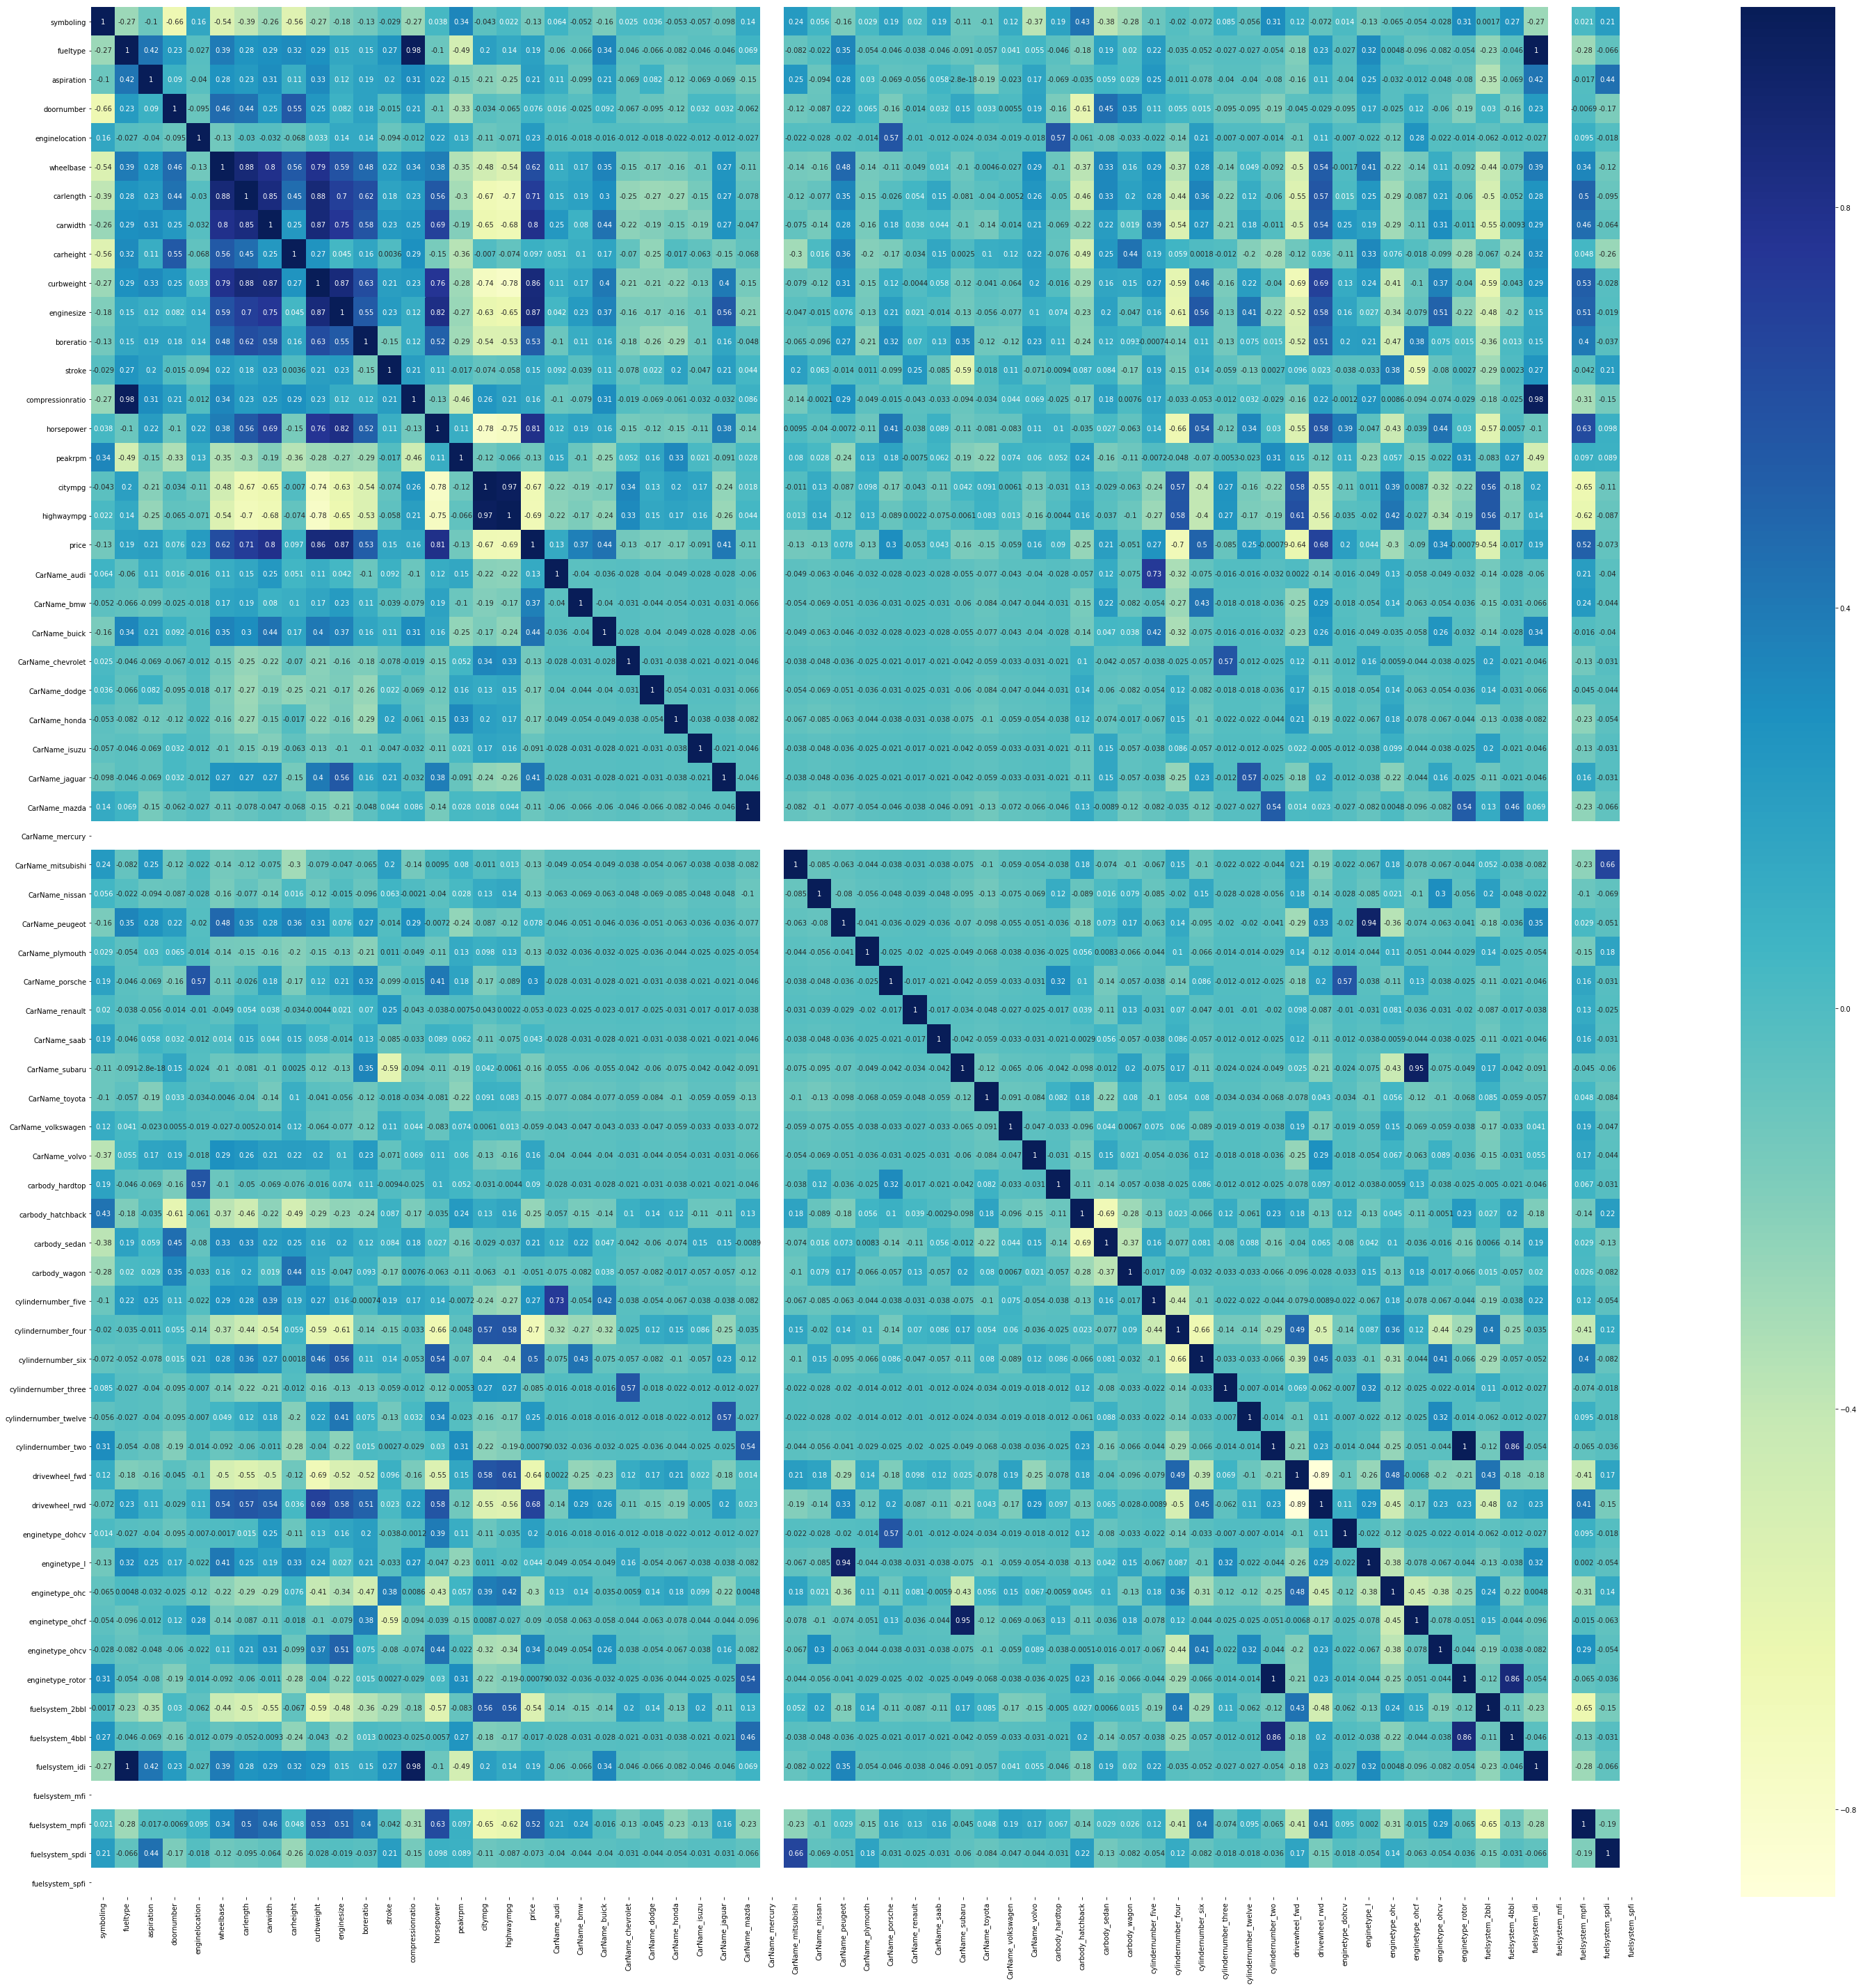

In [23]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [24]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [25]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [26]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 46),
 ('fueltype', False, 18),
 ('aspiration', False, 6),
 ('doornumber', False, 41),
 ('enginelocation', True, 1),
 ('wheelbase', False, 23),
 ('carlength', False, 22),
 ('carwidth', False, 8),
 ('carheight', False, 20),
 ('curbweight', False, 12),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', False, 11),
 ('compressionratio', False, 19),
 ('horsepower', False, 33),
 ('peakrpm', False, 31),
 ('citympg', False, 42),
 ('highwaympg', False, 39),
 ('CarName_audi', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 21),
 ('CarName_dodge', False, 14),
 ('CarName_honda', False, 15),
 ('CarName_isuzu', False, 43),
 ('CarName_jaguar', False, 30),
 ('CarName_mazda', False, 35),
 ('CarName_mercury', False, 45),
 ('CarName_mitsubishi', False, 5),
 ('CarName_nissan', False, 34),
 ('CarName_peugeot', False, 7),
 ('CarName_plymouth', False, 13),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 47),
 ('CarN

In [28]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'enginesize', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'cylindernumber_five', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_rotor'],
      dtype='object')

In [29]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_four', 'cylindernumber_six', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [30]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [32]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [33]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     96.25
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.60e-61
Time:                        11:50:20   Log-Likelihood:                -28.111
No. Observations:                 143   AIC:                             86.22
Df Residuals:                     128   BIC:                             130.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [34]:
X_train_rfe.columns

Index(['const', 'enginelocation', 'enginesize', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'cylindernumber_five', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_rotor'],
      dtype='object')

In [35]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [36]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cylindernumber_two,inf
14,enginetype_rotor,inf
8,cylindernumber_five,4.130000
2,CarName_audi,3.310000
5,CarName_porsche,3.020000
4,CarName_buick,2.160000
0,enginelocation,2.020000
12,enginetype_dohcv,2.020000
1,enginesize,1.930000
10,cylindernumber_twelve,1.330000


#### cylindernumber_three is insignificant in presence of other variables; can be dropped

In [37]:
# Drop cylindernumber_three column
X_train_new = X_train_rfe.drop(["cylindernumber_three"], axis = 1)
X_train_new.head()

,enginelocation,enginesize,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,CarName_saab,CarName_volvo,cylindernumber_five,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_rotor
122,0,-0.660242,0,0,0,0,0,0,0,0,0,0,0,0
125,0,0.637806,0,0,0,1,0,0,0,0,0,0,0,0
166,0,-0.660242,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.123485,0,0,0,0,0,0,0,0,0,0,0,0
199,0,0.123485,0,0,0,0,0,1,0,0,0,0,0,0


#### Rebuilding the model without cylindernumber_three

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [39]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.32e-62
Time:                        11:50:20   Log-Likelihood:                -28.123
No. Observations:                 143   AIC:                             84.25
Df Residuals:                     129   BIC:                             125.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [41]:
X_train_new.columns

Index(['enginelocation', 'enginesize', 'CarName_audi', 'CarName_bmw',
       'CarName_buick', 'CarName_porsche', 'CarName_saab', 'CarName_volvo',
       'cylindernumber_five', 'cylindernumber_twelve', 'cylindernumber_two',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_rotor'],
      dtype='object')

In [42]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cylindernumber_two,inf
13,enginetype_rotor,inf
8,cylindernumber_five,4.130000
2,CarName_audi,3.310000
5,CarName_porsche,3.020000
4,CarName_buick,2.150000
11,enginetype_dohcv,2.020000
0,enginelocation,2.010000
1,enginesize,1.860000
9,cylindernumber_twelve,1.310000


#### cylindernumber_five is insignificant in presence of other variables; can be dropped

In [43]:
# Drop cylindernumber_five column
X_train_new = X_train_new.drop("cylindernumber_five", axis = 1)

In [44]:
X_train_new.head()

,enginelocation,enginesize,CarName_audi,CarName_bmw,CarName_buick,CarName_porsche,CarName_saab,CarName_volvo,cylindernumber_twelve,cylindernumber_two,enginetype_dohcv,enginetype_l,enginetype_rotor
122,0,-0.660242,0,0,0,0,0,0,0,0,0,0,0
125,0,0.637806,0,0,0,1,0,0,0,0,0,0,0
166,0,-0.660242,0,0,0,0,0,0,0,0,0,0,0
1,0,0.123485,0,0,0,0,0,0,0,0,0,0,0
199,0,0.123485,0,0,0,0,0,1,0,0,0,0,0


#### Rebuilding the model without cylindernumber_five

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     113.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.51e-63
Time:                        11:50:20   Log-Likelihood:                -28.247
No. Observations:                 143   AIC:                             82.49
Df Residuals:                     130   BIC:                             121.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernumber_two,inf
12,enginetype_rotor,inf
5,CarName_porsche,3.020000
10,enginetype_dohcv,2.020000
0,enginelocation,2.010000
1,enginesize,1.840000
8,cylindernumber_twelve,1.310000
4,CarName_buick,1.240000
3,CarName_bmw,1.090000
7,CarName_volvo,1.020000


#### enginetype_dohcv is insignificant in presence of other variables; can be dropped

In [47]:
# Drop enginetype_dohcv column
X_train_new = X_train_new.drop("enginetype_dohcv", axis = 1)

#### Rebuilding the model without enginetype_dohcv

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.96e-64
Time:                        11:50:20   Log-Likelihood:                -28.455
No. Observations:                 143   AIC:                             80.91
Df Residuals:                     131   BIC:                             116.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,cylindernumber_two,inf
11,enginetype_rotor,inf
1,enginesize,1.820000
5,CarName_porsche,1.560000
0,enginelocation,1.500000
8,cylindernumber_twelve,1.310000
4,CarName_buick,1.230000
3,CarName_bmw,1.090000
7,CarName_volvo,1.020000
2,CarName_audi,1.000000


#### cylindernumber_twelve is insignificant in presence of other variables; can be dropped

In [50]:
# Drop cylindernumber_twelve column
X_train_new = X_train_new.drop("cylindernumber_twelve", axis = 1)

#### Rebuilding the model without cylindernumber_twelve

In [51]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.58e-64
Time:                        11:50:20   Log-Likelihood:                -29.280
No. Observations:                 143   AIC:                             80.56
Df Residuals:                     132   BIC:                             113.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2408      0

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,cylindernumber_two,inf
10,enginetype_rotor,inf
5,CarName_porsche,1.550000
0,enginelocation,1.500000
1,enginesize,1.390000
4,CarName_buick,1.180000
3,CarName_bmw,1.070000
7,CarName_volvo,1.010000
2,CarName_audi,1.000000
6,CarName_saab,1.000000


#### enginelocation is insignificant in presence of other variables; can be dropped

In [53]:
# Drop enginelocation column
X_train_new = X_train_new.drop("enginelocation", axis = 1)

#### Rebuilding the model without enginelocation

In [54]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.19e-65
Time:                        11:50:20   Log-Likelihood:                -30.827
No. Observations:                 143   AIC:                             81.65
Df Residuals:                     133   BIC:                             111.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2405      0

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_two,inf
9,enginetype_rotor,inf
0,enginesize,1.390000
3,CarName_buick,1.180000
2,CarName_bmw,1.070000
4,CarName_porsche,1.060000
6,CarName_volvo,1.010000
1,CarName_audi,1.000000
5,CarName_saab,1.000000
8,enginetype_l,1.000000


#### cylindernumber_two have high vif value; can be dropped

In [56]:
# Drop cylindernumber_two column
X_train_new = X_train_new.drop("cylindernumber_two", axis = 1)

#### Rebuilding the model without cylindernumber_two

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     149.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.19e-65
Time:                        11:50:21   Log-Likelihood:                -30.827
No. Observations:                 143   AIC:                             81.65
Df Residuals:                     133   BIC:                             111.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.2405      0.031  

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.39
3,CarName_buick,1.18
2,CarName_bmw,1.07
4,CarName_porsche,1.06
8,enginetype_rotor,1.06
6,CarName_volvo,1.01
1,CarName_audi,1.00
5,CarName_saab,1.00
7,enginetype_l,1.00


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_price = lm.predict(X_train_lm)

In [60]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

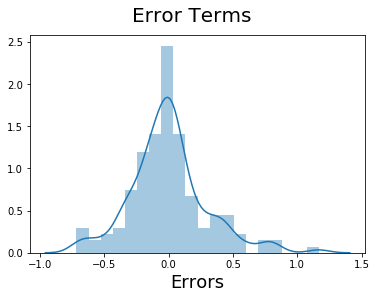

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)

# Plot heading 
fig.suptitle('Error Terms', fontsize = 20)  

# X-label
plt.xlabel('Errors', fontsize = 18)                         

## Step 8 : Making Predictions

In [62]:
# Applying the scaling on the test sets
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

C:\Users\darsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\darsh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
160,-0.682207,0,0,1,0,-0.587157,-0.794680,-0.845273,-0.464750,-1.086333,...,0,0,0,1,0,0,0,0,0,0
186,0.801892,0,0,1,0,-0.325847,-0.328646,-0.286672,0.651450,-0.691974,...,0,0,0,0,0,0,0,1,0,0
59,0.059843,0,0,0,0,-0.080869,0.197800,0.221147,-0.175365,-0.452308,...,0,0,0,1,0,0,0,0,0,0
165,0.059843,0,0,0,0,-0.783139,-0.587554,-1.048400,-0.630112,-0.713761,...,0,0,0,0,0,0,0,1,0,0
140,0.801892,0,0,0,0,-0.979122,-1.571403,-1.149964,0.651450,-0.768231,...,1,0,0,1,0,0,0,0,0,0


In [63]:
# Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9 : Model Evaluation

Text(0, 0.5, 'Car Price')

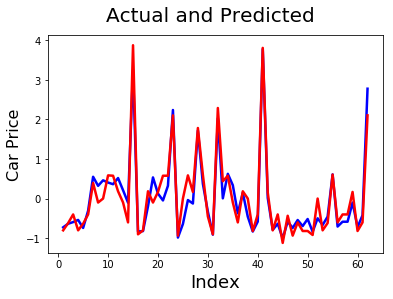

In [66]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()

#Plotting Actual
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")

#Plotting predicted
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") 

# Plot heading 
fig.suptitle('Actual and Predicted', fontsize=20)  

# X-label and Y-label
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Car Price', fontsize=16)  

Text(0, 0.5, 'y_pred')

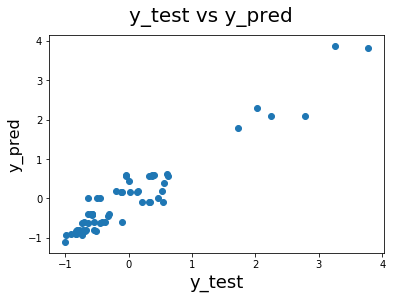

In [67]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
# Plot heading
fig.suptitle('y_test vs y_pred', fontsize=20)   

# X-label and Y-label
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'ytest-ypred')

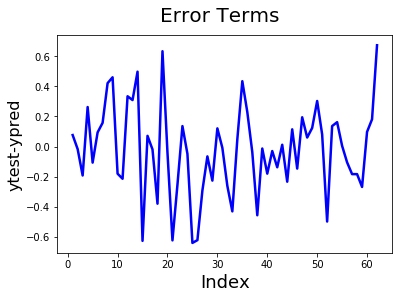

In [68]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")

# Plot heading
fig.suptitle('Error Terms', fontsize=20)  

# X-label and Y-label
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)

Text(0.5, 0, 'Errors')

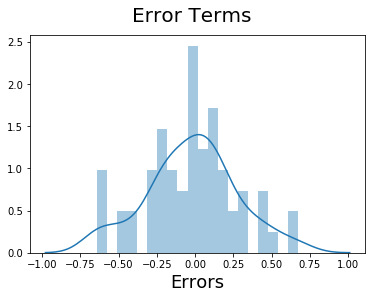

In [69]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)

# Plot heading
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)

###### Checking the R-squared on the test set

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9128180344171027

##### Looking at the RMSE

In [71]:
import numpy as np
from sklearn import metrics
print('MSE :', (metrics.mean_squared_error(y_test, y_pred)))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 0.08718196558289724
RMSE : 0.29526592350438485
